---
title: Lecture 1
subtitle: Image Operations
date: 2024-08-22
---

## OpenCV basics

### Import required libraries

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

:::{note}
CV and CV2 are the API versions (not reference to the version of [OpenCV](https://opencv.org/)). CV is the original C code version, whereas CV2 is the C++ version.

[OpenCV Tutorials](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
:::

### Loading an image

We'll load in an image of the Cathedral of Learning[^cathedral_credit].  The [`imread`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html) function is used to load an image.

[^cathedral_credit]: [Link](https://commons.wikimedia.org/wiki/File:CathedralFromSS.jpg), Credit: Michael G. White, Copyright: © 2007 Michael G. White

In [18]:
cathedral_image = cv2.imread(os.path.relpath('assets/Pitt_Cathedral.jpg'))

Since the image is a 3D [NumPy](https://numpy.org/) array, NumPy attributes such as [`shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) and [`dtype`](https://numpy.org/doc/stable/reference/arrays.dtypes.html) can be used to obtain information about the image.

In [36]:
# print the size of the image
print("Image size (H, W, channels) is:", cathedral_image.shape)

# print the data-type of the image
print("Data type of the image is:", cathedral_image.dtype)

Image size (H, W, channels) is: (768, 1024, 3)
Data type of the image is: uint8


[Matplotlib](https://matplotlib.org/) can be used to display the image.

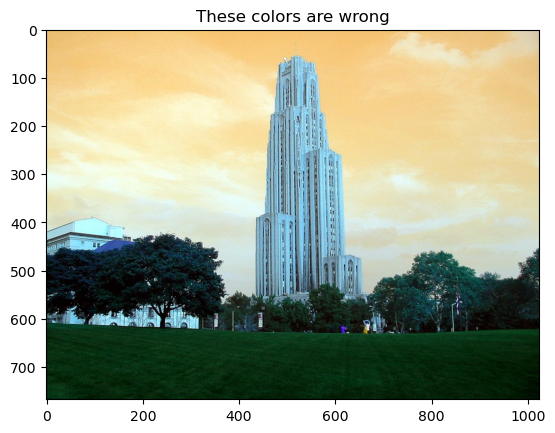

In [19]:
plt.imshow(cathedral_image)
plt.title("These colors are wrong")
plt.show()

### Changing color maps

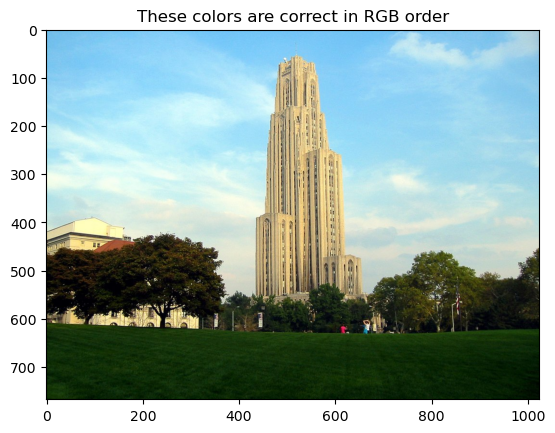

In [20]:
# We have to reverse the color order to get from BGR to RGB
cathedral_image_rgb = cathedral_image[:, :, ::-1]
plt.imshow(cathedral_image_rgb)
plt.title("These colors are correct in RGB order")
plt.show()

:::{note}
OpenCV reads the image in as a 3D Numpy array. The slicing operation `[:, :, ::-1]` means take all the rows, take all the columns, and reverse the channels.
:::

#### Using the split command

Each pixel in an image is described by its row, height, and channel tuple.

The `split` command can be used to see each channel separately.

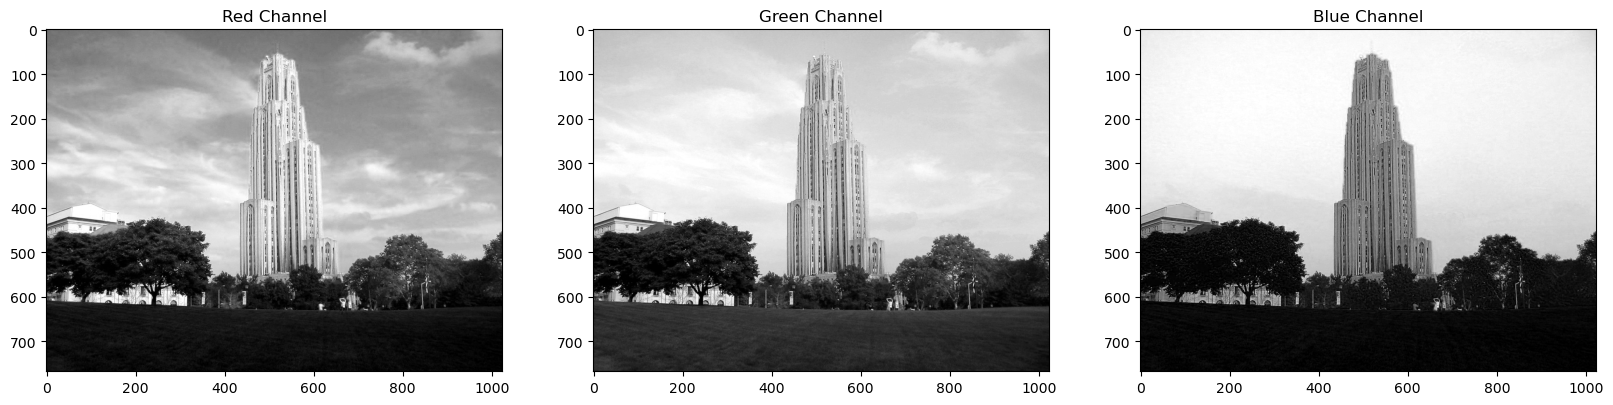

In [39]:
# Split the image into B, G, R components
b, g, r = cv2.split(cathedral_image)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(131); plt.imshow(r, cmap="gray"); plt.title('Red Channel')
plt.subplot(132); plt.imshow(g, cmap="gray"); plt.title('Green Channel')
plt.subplot(133); plt.imshow(b, cmap="gray"); plt.title('Blue Channel')

plt.show()

You can merge the three channels using the `merge` function:

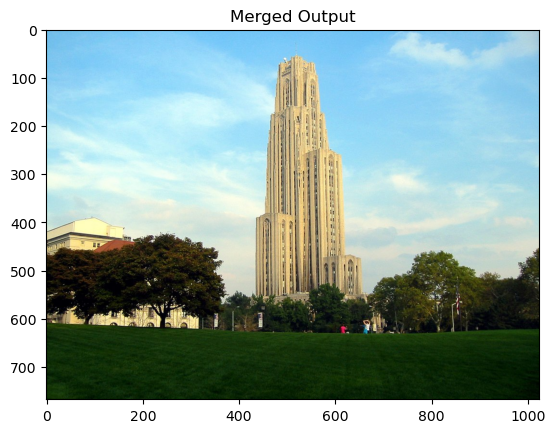

In [23]:
# merge the individual channels
img_merged = cv2.merge((r, g, b))

# Show the merged output
plt.imshow(img_merged)
plt.title('Merged Output')
plt.show()

#### Using cvtColor command

We can also use [`cvtColor`](https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0) to convert the color scheme to various options. 

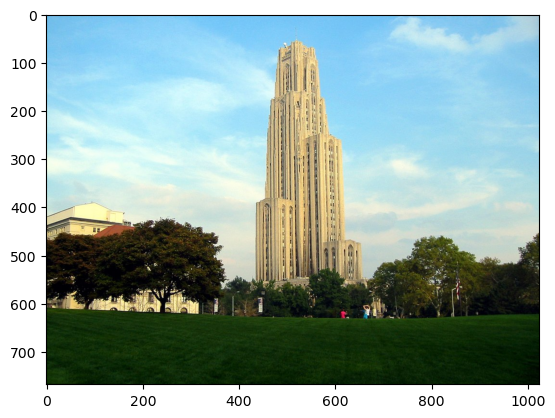

In [25]:
cathedral_image_rgb = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2RGB)
plt.imshow(cathedral_image_rgb)
plt.show()

### HSV color scheme

[HSV](wiki:HSL_and_HSV) can be thought of as a radial space, whereas RGB is a cartisean space.

- Hue: The "angle". Imagine the colorwheel.
- Saturation: The "radius". THe center will be white and the edge the deepest of that color.
- Value: The "height". 0 is black/darker version of that color

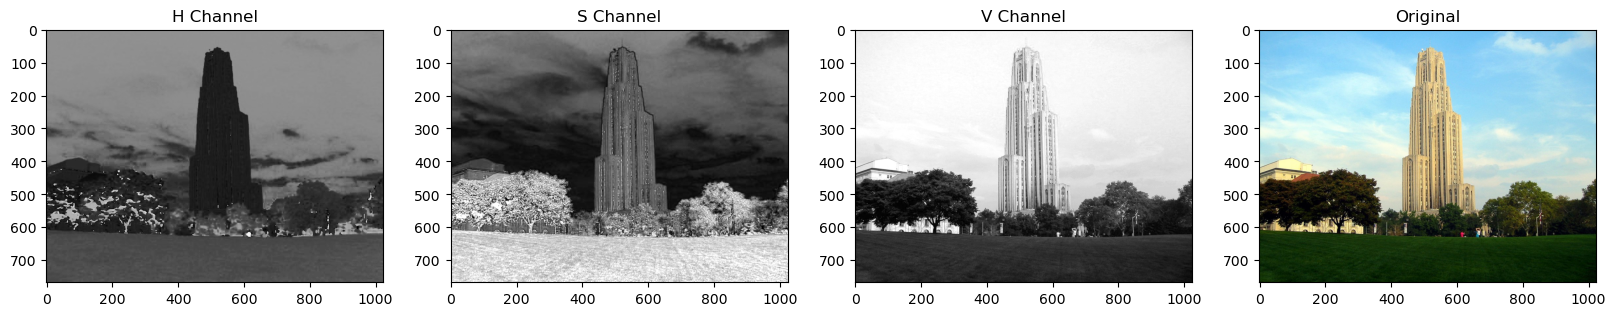

In [28]:
img_hsv = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2HSV)

# Split the image into the H, S, V components
h, s, v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141); plt.imshow(h, cmap="gray"); plt.title("H Channel")
plt.subplot(142); plt.imshow(s, cmap="gray"); plt.title("S Channel")
plt.subplot(143); plt.imshow(v, cmap="gray"); plt.title("V Channel")
plt.subplot(144); plt.imshow(cathedral_image_rgb); plt.title("Original")
plt.show()

We can edit the values. 

In [40]:
h_new = h + 30
mod_merged_hsv = cv2.merge((h_new, s, v))
mod_rgb = cv2.cvtColor(mod_merged_hsv, cv2.COLOR_HSV2RGB)

Similarly for the saturation channel:

In [41]:
s_new = s - 20
mod_merged_hsv2 = cv2.merge((h, s_new, v))
mod_rgb2 = cv2.cvtColor(mod_merged_hsv2, cv2.COLOR_HSV2RGB)

Plotting the modified channels:

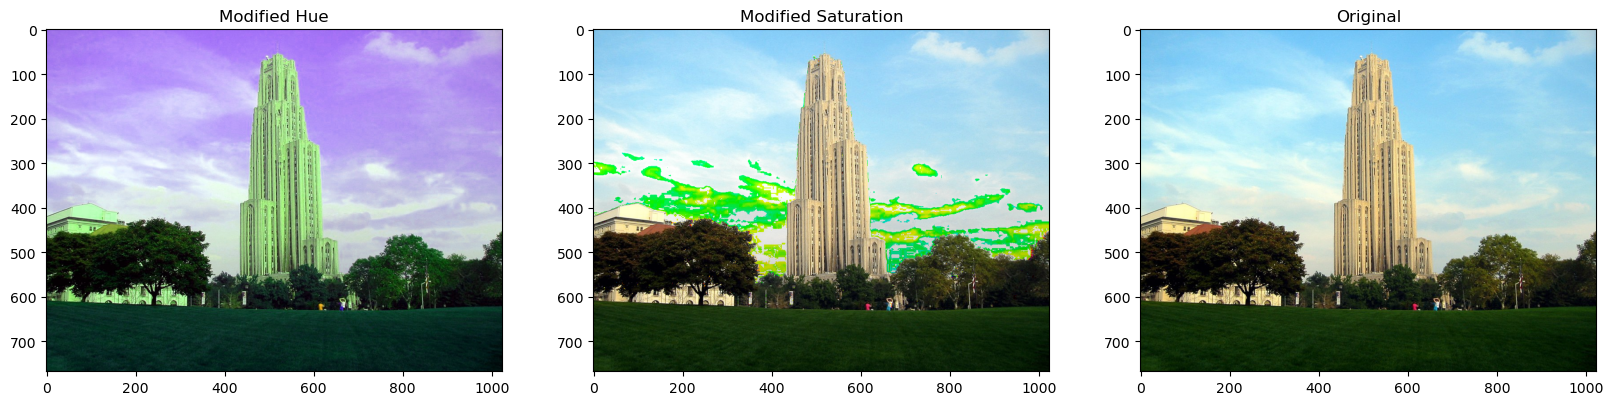

In [42]:
plt.figure(figsize=[20,5])
plt.subplot(131); plt.imshow(mod_rgb); plt.title("Modified Hue")
plt.subplot(132); plt.imshow(mod_rgb2); plt.title("Modified Saturation")
plt.subplot(133); plt.imshow(cathedral_image_rgb); plt.title("Original")
plt.show()

:::{note}
The saturation is showing [clipping](wiki:Clipping_(photography)).
:::

### Saving files

Use `imwrite` to write the image to disk. More information available in the [documentation](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac).

In [34]:
# save the image
cv2.imwrite("cathedral_image_(RGB).png", cathedral_image_rgb);

You can remove files via the following if you don't like clutter:

In [35]:
os.remove("cathedral_image_(RGB).png")

## Basic Image Manipulations

In [44]:
# Read image as gray scale
cb_img = cv2.imread(os.path.relpath('assets/checkerboard_18x18.png'), 0)

# Show the underlying data
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

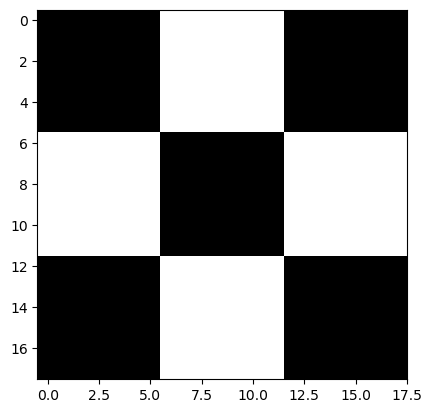

In [45]:
# Render the image
plt.imshow(cb_img, cmap="gray")
plt.show()

### Accessing and manipulating image pixels

You can access individual pixels using NumPy array operations.

In [47]:
# print the first pixel of the first black box
print(cb_img[0, 0])

0


In [48]:
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

255


### Manipulating image pixels

You can modify the intensity values of pixels by using NumPy operations to assign a new value to the pixel.

In [52]:
cb_img_copy = cb_img.copy()
cb_img_copy[2:4, 2:4] = 200

# Show the underlying data
print(cb_img_copy)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

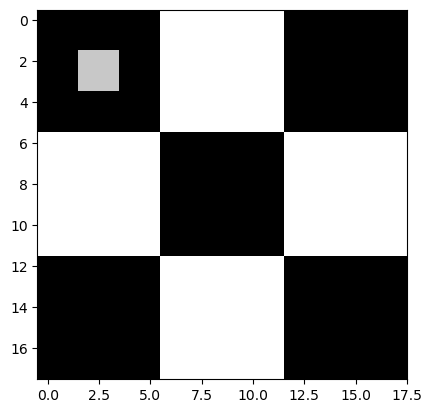

In [54]:
# Render the image
plt.imshow(cb_img_copy, cmap="gray")
plt.show()

### Cropping images

Cropping an image is achieved by simply selecting a group of pixels.

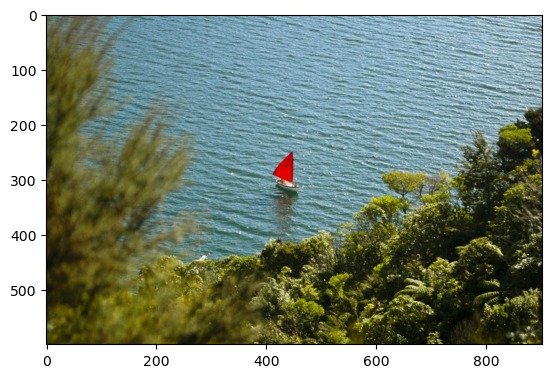

In [60]:
img_NZ_bgr = cv2.imread(os.path.relpath('assets/New_Zealand_Boat.jpg'), cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)
plt.show()

Crop out the middle region of the image

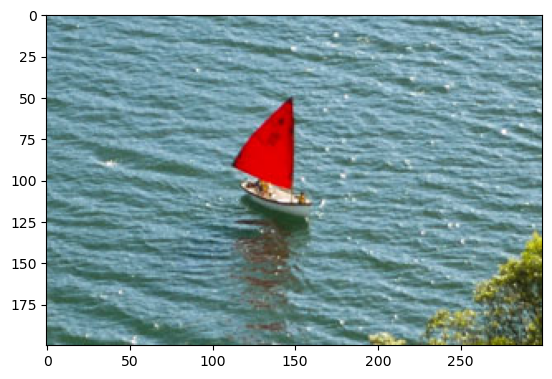

In [61]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)
plt.show()

### Resizing images

The function [`resize`]("https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d") resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`, `dsize`, `fx`, and `fy`.

:::{code} python
:caption: `resize` function syntax
dst = resize(src, dsize[, fx[, interpolation]]]])
:::

`dst`
: output image; it has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of `dst` is the same as `src`.

__Required arguments__

`src`
: input image

`dsize`
: output image size

__Optional arguments__

`fx`
: Scale factor along the horizontal axis; when it equals 0, it is computed as `(double)dsize.width/src.cols`

`fy`
: Scale factor along the vertical axis; when it equals 0, it is computed as `(double)dsize.height/src.rows`

#### Specifying scaling factor using `fx` and `fy`

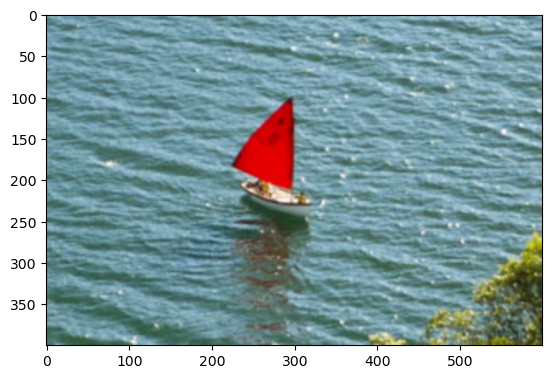

In [63]:
resized_cropped_region_2X = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2X)
plt.show()

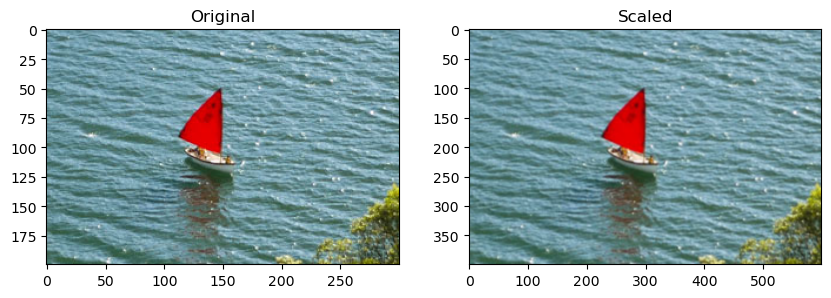

In [70]:
plt.figure(figsize=[10, 5])
plt.subplot(121); plt.imshow(cropped_region); plt.title("Original")
plt.subplot(122); plt.imshow(resized_cropped_region_2X); plt.title("Scaled")
plt.show()

:::{note}
The images look the same but notice the scale in the axes are doubled.
:::

#### Specifying exact size of the output image

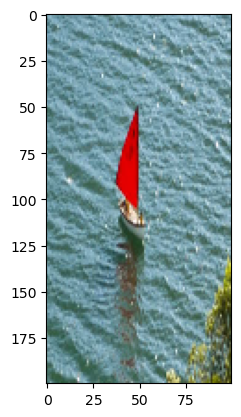

In [71]:
desired_width, desired_height = 100, 200
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim)
plt.imshow(resized_cropped_region)
plt.show()

#### Resize while maintaining aspect ratio

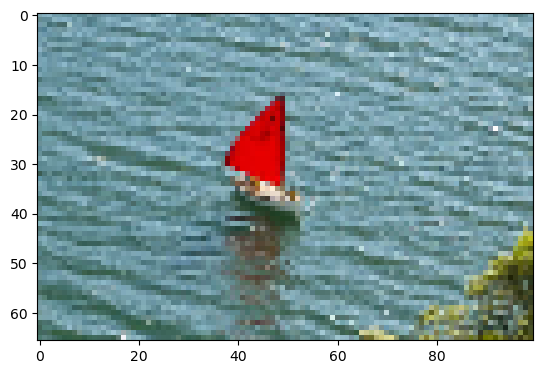

In [87]:
# Define a width
desired_width = 100
# Get the original size
original_height, original_width = cropped_region.shape[:2]
# calculate the aspect ratio
aspect_ratio = desired_width/original_width
# calculate the new height maintaining the aspect ratio
desired_height = int(aspect_ratio * original_height)
dim = (desired_width, desired_height)

# Resize the image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim)
plt.imshow(resized_cropped_region)
plt.show()

### Flipping images

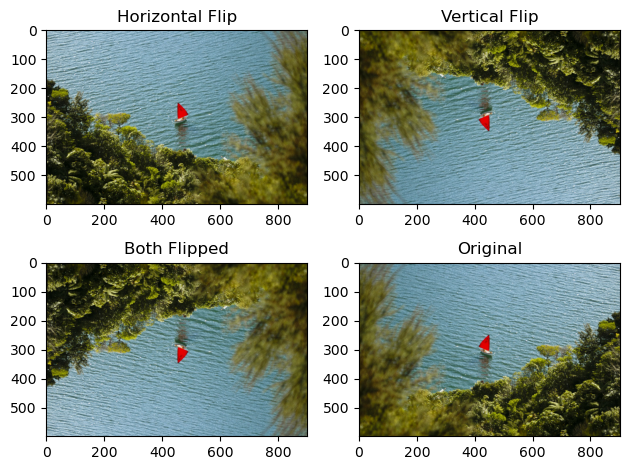

In [98]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.figure()
plt.subplot(221);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(222);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(223);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(224);plt.imshow(img_NZ_rgb);plt.title("Original");
plt.tight_layout()
plt.show()

## Annotating images

Annotations are useful for marking up your results from presentations or demos. They can also be useful during development and debugging.

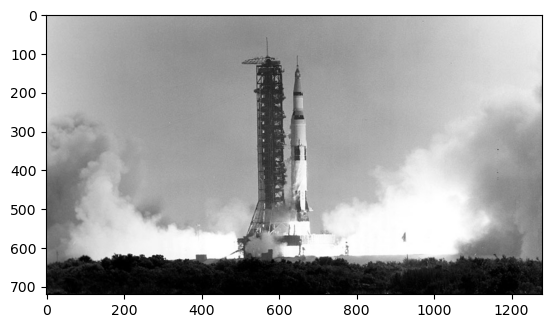

In [99]:
# Read in an image
image = cv2.imread(os.path.relpath('assets/Apollo_11_launch.jpg'), cv2.IMREAD_COLOR)

# Render the original image
plt.imshow(image[:, :, ::-1])
plt.show()

### Drawing lines

Drawing lines can be accomplished using the [`line`](https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2) function.

:::{code} python
:caption: `line` function syntax
img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
:::

`img`
: The output image that has been annotated

__Required arguments__

`img`
: Image on which we will draw the line

`pt1`
: First point (x, y) of the line segment

`pt2`
: Second point (x, y) of the line segment

`color`
: Color of the line which will be drawn

__Optional arguments__

`thickness`
: Integer specifying the line thickness. Default value is 1

`lineType`
: Type of line. Default is 8 which stands for an 8-connected line. Usually `cv2.LINE_AA` (antialiased or smooth line) is used for the `lineType`

Let's do an example of a line which starts from (200, 100), ends at (400, 100), is yellow, has a thickness of 5 pixels, and is a smooth line.

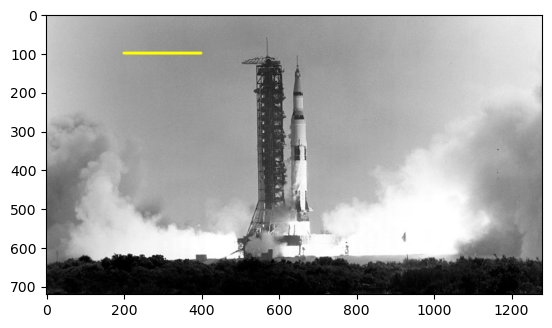

In [102]:
imageLine = image.copy()

# Line coordinates
start = (200, 100)
stop = (400, 100)

# Remember since BGR format, yellow is (0, 255, 255)
yellow = (0, 255, 255)

cv2.line(imageLine, start, stop, yellow, thickness=5, lineType=cv2.LINE_AA)

# Render the image
plt.imshow(imageLine[:, :, ::-1])
plt.show()

### Drawing circles

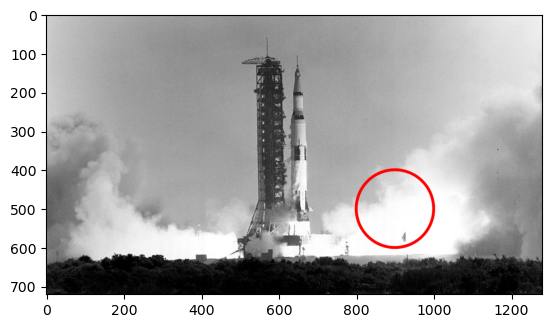

In [104]:
imageCircle = image.copy()

# center (x, y) coordinates
center = (900, 500)

# radius of circle
r = 100
red = (0, 0, 255)

cv2.circle(imageCircle, center, r, red, thickness=5, lineType=cv2.LINE_AA)

# Render the image
plt.imshow(imageCircle[:, :, ::-1])
plt.show()

### Drawing rectangles

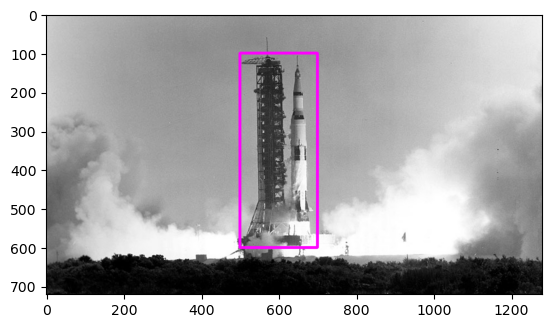

In [107]:
imageRectangle = image.copy()

top_left_vertex = (500, 100)
bottom_right_vertex = (700, 600)
purple = (255, 0, 255)

cv2.rectangle(imageRectangle, top_left_vertex, bottom_right_vertex, purple, thickness=5, lineType=cv2.LINE_AA)

plt.imshow(imageRectangle[:, :, ::-1])
plt.show()

### Adding text

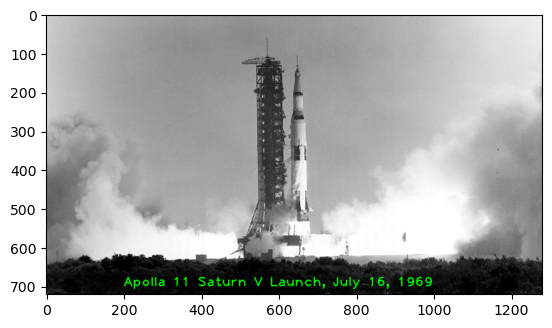

In [109]:
imageText = image.copy()
text = "Apolla 11 Saturn V Launch, July 16, 1969"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2
origin = (200, 700) # origin is the bottom left corner of the text string

cv2.putText(imageText, text, origin, fontFace, fontScale, fontColor, thickness=fontThickness, lineType=cv2.LINE_AA)

plt.imshow(imageText[:, :, ::-1])
plt.show()

:::{important}
Annotations modify the data in place
:::

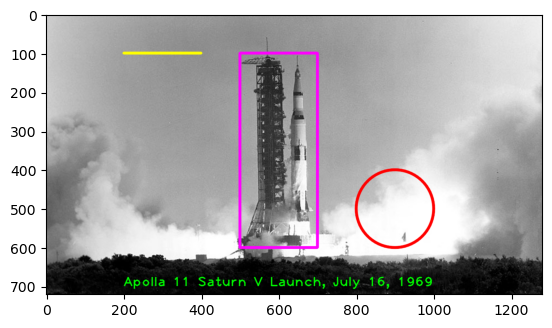

In [114]:
imageMarked = image.copy()

cv2.line(imageMarked, start, stop, yellow, thickness=5, lineType=cv2.LINE_AA)
cv2.circle(imageMarked, center, r, red, thickness=5, lineType=cv2.LINE_AA)
cv2.rectangle(imageMarked, top_left_vertex, bottom_right_vertex, purple, thickness=5, lineType=cv2.LINE_AA)
cv2.putText(imageMarked, text, origin, fontFace, fontScale, fontColor, thickness=fontThickness, lineType=cv2.LINE_AA)

plt.imshow(imageMarked[:, :, ::-1])
plt.show()